# 1. Loading Libraries and Data

In [3]:
import re # for regular expressions
import pandas as pd 
pd.set_option("display.max_colwidth", 200)
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk # for text manipulation
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [32]:
data  =pd.read_excel("dataset.xlsx")
data.head(5)

,subject,Customer,Location,Rating,date_time,Views,complaint,Total_reviews_by_customer,Customer_follower
0,Cheaters,ambajirao_a,Bangalore India,1,"Apr 22, 2014 05:22 PM",9558 Views,Third class service and they are cheaters. Never ever opt for this. While taking money they are not bothered about the identity of person giving money but while refund or surrender of policy they ...,2 Reviews,1 Follower
1,"Well, think again!!!!!",deekshasethi,new delhi india,4,"Mar 13, 2006 09:41 PM",3548 Views,"Its true that insurance is a services based industry and that it is very important to know the status of ur plan for a customer but I feel that when a person buys a paln, he sure has a plan and if...",7 Reviews,6 Followers
2,Metlife is the worst insurance company,lijok,Kochi India,1,"Jun 04, 2013 09:08 AM",9311 Views,I have taken a Metlife policy in 2008 August when the sen-sex was down.\nI was planning to put the money as Fixed deposit. But the bank people insist me to take the Metlife policy. They said I nee...,1 Review,NaN
3,HAVE U MET LIFE TODAY??????,Kiran4,mumbai india,4,"Oct 14, 2004 02:06 PM",15309 Views,Scene 1 : A lady weeping besides the dead body of her Husband....her 3yr old son quite oblivious to what had happened just wiping his mothers tears...her 5 yr old daughter cud understand something...,15 Reviews,28 Followers
4,Irresponsible persons working over there in PNB,srikanthkumar.a,Bengaluru/ Bangalore India,1,"May 31, 2017 07:30 PM",3480 Views,"Once policy created, no one look back to customers for any kind of issues. irresponsible persons only working over there . customer care is too worst they don't know what is insurance policy. Es...",1 Review,NaN


In [33]:
data[data['Rating'] == 1].head(10)

,subject,Customer,Location,Rating,date_time,Views,complaint,Total_reviews_by_customer,Customer_follower
0,Cheaters,ambajirao_a,Bangalore India,1,"Apr 22, 2014 05:22 PM",9558 Views,Third class service and they are cheaters. Never ever opt for this. While taking money they are not bothered about the identity of person giving money but while refund or surrender of policy they ...,2 Reviews,1 Follower
2,Metlife is the worst insurance company,lijok,Kochi India,1,"Jun 04, 2013 09:08 AM",9311 Views,I have taken a Metlife policy in 2008 August when the sen-sex was down.\nI was planning to put the money as Fixed deposit. But the bank people insist me to take the Metlife policy. They said I nee...,1 Review,NaN
4,Irresponsible persons working over there in PNB,srikanthkumar.a,Bengaluru/ Bangalore India,1,"May 31, 2017 07:30 PM",3480 Views,"Once policy created, no one look back to customers for any kind of issues. irresponsible persons only working over there . customer care is too worst they don't know what is insurance policy. Es...",1 Review,NaN
8,HEAVY LOSSES ON PNB METSMART PLATINUM- NEVERBUY!!,aggrwalmeha,Delhi India,1,"Sep 09, 2015 02:24 PM",9355 Views,"I am a life insurance policy holder of PNB Metife, policy number- 21389787. Only God knows what is happening with the fund value. My fund value of approx INR 3, 06, 000. After, I have paid my prem...",1 Review,1 Follower
10,Pathetic Customer Service,kittusvkm,Bangalore Inida,1,"Mar 06, 2007 10:41 PM",4128 Views,I had taken a ULIP with Metlife last year for 41000/-. Paid the first premium. The second premium is due on 31/01/2007. I have given the cheque to my financial advisor on 14/01/2007. The chequ...,1 Review,NaN
11,PNB Metlife Endowment Saving +,rakeshanansoni,"New Delhi, India India",1,"Nov 22, 2018 05:23 PM",168 Views,Is a TOTAL FRAUD .DO NOT GO FOR THAT say I deposited 50 000 for 5 year around 250000 .I will get 160000 after 5 year LOSS of 1 Lac. Agents sitting in Bank often target FD Customer and say that wil...,2 Reviews,1 Follower
12,Crooks and dangerous,roopamroy,Miamisburg OH India,1,"Jul 26, 2014 03:26 PM",9286 Views,Only invest in this company if you have sympathy for crooks and criminals since that money will never come back. I believe they are doing business just to acquire public money and then run away. ...,1 Review,NaN
13,"Peace of mind, not guaranteed",sumanblr,Bangalore India,1,"Jul 26, 2012 11:37 AM",8654 Views,Policy No: 00241364\nPolicy started in: December 2006\nPolicy surrendered in: June 2012\nPolicy yearly EMI: Rs.6400\nPolicy total money paid: Rs.38400\nPolicy surrender value: Rs.9600(25%)\nMoney ...,6 Reviews,NaN
14,"If you have excess money, get drained with Metlife",dayaking,Bangalore India,1,"Apr 08, 2011 11:29 AM",4186 Views,"I had purchased a ""Met-smart"" plan in april 2006. With the advice of RAMESH MANOOR from Metlife.\nInitially I had agreed for a policy of 2 lac coverage. At the last minute, he had changed it to Rs...",5 Reviews,1 Follower
15,NEVER INVEST. Worst Fund Performance by PNB MetLif,ramireddysaikrish,India,1,"Jun 15, 2016 03:00 PM",11548 Views,"I took ULIP Met life met smart Accelerator fund in 2006 ==policy number 00203123, == from 2006 to 2016( 10 Years) quarterly premium of Rs 8999 . Total investment of Rs 359960 .\nToday the fu...",1 Review,NaN


In [34]:
data[data['Rating'] == 2].head(10)

,subject,Customer,Location,Rating,date_time,Views,complaint,Total_reviews_by_customer,Customer_follower
7,Evaluate carefully before choosing!,IndianReviewer,banglaore india,2,"Feb 24, 2014 12:15 PM",8334 Views,Evaluate carefully before choosing.\nDo not fall for that you have to pay only for 5 years. Because premium is high. For eg. premium for 1 crore cover is 50000 and you pay for 5 years totalizing 2...,3 Reviews,NaN
9,Metlife India Life Insurance premium hassles,gdgupta,Chandigarh India,2,"Jun 08, 2009 06:38 PM",4234 Views,"I would like to share my experience with all you how are planning to take a life insurance policy from METLIFE beware. firstly, the agent don't have proper information about the plans that they ar...",1 Review,NaN
53,Please avoid PNB Metlife,akhare1953,Lucknow India,2,"Feb 24, 2015 01:10 PM",10069 Views,I am Dr A K Khare and I am holder of PNB Metlife policy 20234699 since 2010. I have submitted my policy surrender request on 31 January 2015 but they say they have not received it. I have even sen...,6 Reviews,1 Follower
59,Worst insurance company,varigopi,Kottayam India,2,"May 06, 2013 05:17 PM",8058 Views,Don't think about metlife.... it is the worst company to invest. The people who work for the company is criminals....met life is run by crooks and politicians... it is run by criminals... if you c...,1 Review,NaN
78,PNB MetLife Life Insurance,p162_261,Delhi India,2,"Mar 15, 2018 03:02 PM",306 Views,I feel that the returns of PNB MetLife Life Insurance are less and the premium is high.I was suggested by one of my friends to invest my money with PNB MetLife Life Insurance Pension Plan.Its web ...,237 Reviews,71 Followers
80,My bad experience with Metlife,roshk,Ahmedabad India,2,"Mar 11, 2011 03:42 PM",6832 Views,"Based on reviews of the plan, I applied for MetProtect online term insurance plan for Rs 25 lakhs for a duration of 35 years. I paid the premium by credit card and completed all the documentary re...",1 Review,NaN
99,THINK BEFORE TAKE A PLAN,palikadada,Vijayawada India,2,"Mar 07, 2007 10:10 AM",3992 Views,"As per as my experience with METLIFE is concern i.e, customer service and staff attitude is not upto the standards of private and corporate sector, behaves like public sector companies.Even in pr...",1 Review,NaN
100,Customer service sure needs improvement,dshirvaikar,Mumbai India,2,"Oct 08, 2011 05:30 PM",5641 Views,I bought Metprotect on 28th Sept '11 online and got a call on 1st Oct' 11 from their B'lore centre. But after promising that their vendor will call me to collect the documents and for the medical ...,3 Reviews,2 Followers
105,PNB MetLife life insurance bad experience,anwarshekh1111,Jaipur India,2,"Oct 29, 2016 01:37 AM",6696 Views,Hi companions A study by prevalent life guarantor PNB MetLife has tossed another light on how representatives see and yearning their life coverage plans. PNB MetLife is a main swindling insurance ...,358 Reviews,117 Followers
106,MetLife - Good advice bad service,surya1972,Thane India,2,"Mar 03, 2006 06:49 PM",9043 Views,"I am not a person who would normally write reviews on products or give advice on anything, but insurance is a different matter.\nI would like to share my experiences with MetLife in the best way I...",2 Reviews,NaN


In [35]:
data.shape

(130, 9)

In [36]:
data["Rating"].value_counts()

1    93
4    15
2    12
5     7
3     3
Name: Rating, dtype: int64

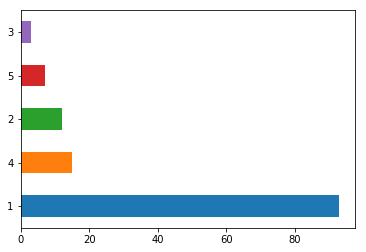

In [37]:
data['Rating'].value_counts().plot.barh()

# 2. Data Cleaning

In [38]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt

# 2.1  Removing Punctuations, Numbers, and Special Characters

In [39]:
data['complaint_1'] = data['complaint'].str.replace("[^a-zA-Z#]", " ")
data.head(10)

,subject,Customer,Location,Rating,date_time,Views,complaint,Total_reviews_by_customer,Customer_follower,complaint_1
0,Cheaters,ambajirao_a,Bangalore India,1,"Apr 22, 2014 05:22 PM",9558 Views,Third class service and they are cheaters. Never ever opt for this. While taking money they are not bothered about the identity of person giving money but while refund or surrender of policy they ...,2 Reviews,1 Follower,Third class service and they are cheaters Never ever opt for this While taking money they are not bothered about the identity of person giving money but while refund or surrender of policy they ...
1,"Well, think again!!!!!",deekshasethi,new delhi india,4,"Mar 13, 2006 09:41 PM",3548 Views,"Its true that insurance is a services based industry and that it is very important to know the status of ur plan for a customer but I feel that when a person buys a paln, he sure has a plan and if...",7 Reviews,6 Followers,Its true that insurance is a services based industry and that it is very important to know the status of ur plan for a customer but I feel that when a person buys a paln he sure has a plan and if...
2,Metlife is the worst insurance company,lijok,Kochi India,1,"Jun 04, 2013 09:08 AM",9311 Views,I have taken a Metlife policy in 2008 August when the sen-sex was down.\nI was planning to put the money as Fixed deposit. But the bank people insist me to take the Metlife policy. They said I nee...,1 Review,NaN,I have taken a Metlife policy in August when the sen sex was down I was planning to put the money as Fixed deposit But the bank people insist me to take the Metlife policy They said I need...
3,HAVE U MET LIFE TODAY??????,Kiran4,mumbai india,4,"Oct 14, 2004 02:06 PM",15309 Views,Scene 1 : A lady weeping besides the dead body of her Husband....her 3yr old son quite oblivious to what had happened just wiping his mothers tears...her 5 yr old daughter cud understand something...,15 Reviews,28 Followers,Scene A lady weeping besides the dead body of her Husband her yr old son quite oblivious to what had happened just wiping his mothers tears her yr old daughter cud understand something...
4,Irresponsible persons working over there in PNB,srikanthkumar.a,Bengaluru/ Bangalore India,1,"May 31, 2017 07:30 PM",3480 Views,"Once policy created, no one look back to customers for any kind of issues. irresponsible persons only working over there . customer care is too worst they don't know what is insurance policy. Es...",1 Review,NaN,Once policy created no one look back to customers for any kind of issues irresponsible persons only working over there customer care is too worst they don t know what is insurance policy Es...
5,So far so good,vijayv82,Chennai India,4,"Apr 14, 2011 11:59 AM",4692 Views,My requirement:\nIam Vijay aged 29. I was looking for a pure term plan as I didn't wanted to mix insurance and investment. I wanted the SI to be ~ 50 L for a term of 30-35 years\nMy initial resear...,2 Reviews,NaN,My requirement Iam Vijay aged I was looking for a pure term plan as I didn t wanted to mix insurance and investment I wanted the SI to be L for a term of years My initial research...
6,Pnb Metlife,sohitdhiman12,Dwarka India,5,"Sep 28, 2018 05:27 PM",952 Views,PNB metlife insurance befits are good they gave me accidental.critical illiness cover with rider cover rider upto age of 75 years.I am paying the monthly premium of 1500 it has the term of 35 year...,198 Reviews,46 Followers,PNB metlife insurance befits are good they gave me accidental critical illiness cover with rider cover rider upto age of years I am paying the monthly premium of it has the term of year...
7,Evaluate carefully before choosing!,IndianReviewer,banglaore india,2,"Feb 24, 2014 12:15 PM",8334 Views,Evaluate carefully before choosing.\nDo not fall for that you have to pay only for 5 years. Because premium is high. For eg. premium for 1 crore cover is 50000 and you pay for 5 years totalizing 2...,3 Reviews,NaN,Evaluate carefully before choosing Do not fall for 

# 2.2 Removing Short Words

In [40]:
data['complaint_1'] = data['complaint'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
data.head()

,subject,Customer,Location,Rating,date_time,Views,complaint,Total_reviews_by_customer,Customer_follower,complaint_1
0,Cheaters,ambajirao_a,Bangalore India,1,"Apr 22, 2014 05:22 PM",9558 Views,Third class service and they are cheaters. Never ever opt for this. While taking money they are not bothered about the identity of person giving money but while refund or surrender of policy they ...,2 Reviews,1 Follower,Third class service they cheaters. Never ever this. While taking money they bothered about identity person giving money while refund surrender policy they want communicate with policy owner only t...
1,"Well, think again!!!!!",deekshasethi,new delhi india,4,"Mar 13, 2006 09:41 PM",3548 Views,"Its true that insurance is a services based industry and that it is very important to know the status of ur plan for a customer but I feel that when a person buys a paln, he sure has a plan and if...",7 Reviews,6 Followers,"true that insurance services based industry that very important know status plan customer feel that when person buys paln, sure plan not, advisor does. entrirely responsibility company update abou..."
2,Metlife is the worst insurance company,lijok,Kochi India,1,"Jun 04, 2013 09:08 AM",9311 Views,I have taken a Metlife policy in 2008 August when the sen-sex was down.\nI was planning to put the money as Fixed deposit. But the bank people insist me to take the Metlife policy. They said I nee...,1 Review,NaN,have taken Metlife policy 2008 August when sen-sex down. planning money Fixed deposit. bank people insist take Metlife policy. They said need only three years after three years amount will become ...
3,HAVE U MET LIFE TODAY??????,Kiran4,mumbai india,4,"Oct 14, 2004 02:06 PM",15309 Views,Scene 1 : A lady weeping besides the dead body of her Husband....her 3yr old son quite oblivious to what had happened just wiping his mothers tears...her 5 yr old daughter cud understand something...,15 Reviews,28 Followers,Scene lady weeping besides dead body Husband....her quite oblivious what happened just wiping mothers tears...her daughter understand something happened dad..she sits besides trying wake up.... la...
4,Irresponsible persons working over there in PNB,srikanthkumar.a,Bengaluru/ Bangalore India,1,"May 31, 2017 07:30 PM",3480 Views,"Once policy created, no one look back to customers for any kind of issues. irresponsible persons only working over there . customer care is too worst they don't know what is insurance policy. Es...",1 Review,NaN,"Once policy created, look back customers kind issues. irresponsible persons only working over there customer care worst they don't know what insurance policy. Especially online system, premium val..."


# 2.3 Text Normalization

In [41]:
data1 = data['complaint_1'].apply(lambda x: x.split()) # tokenizing
data1.head()

0    [Third, class, service, they, cheaters., Never, ever, this., While, taking, money, they, bothered, about, identity, person, giving, money, while, refund, surrender, policy, they, want, communicate...
1    [true, that, insurance, services, based, industry, that, very, important, know, status, plan, customer, feel, that, when, person, buys, paln,, sure, plan, not,, advisor, does., entrirely, responsi...
2    [have, taken, Metlife, policy, 2008, August, when, sen-sex, down., planning, money, Fixed, deposit., bank, people, insist, take, Metlife, policy., They, said, need, only, three, years, after, thre...
3    [Scene, lady, weeping, besides, dead, body, Husband....her, quite, oblivious, what, happened, just, wiping, mothers, tears...her, daughter, understand, something, happened, dad..she, sits, besides...
4    [Once, policy, created,, look, back, customers, kind, issues., irresponsible, persons, only, working, over, there, customer, care, worst, they, don't, know, what, insurance, p

In [42]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

data1 = data1.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming

In [44]:
for i in range(len(data1)):
    data1[i] = ' '.join(data1[i])
    
data['complaint_1'] = data1

# 3. Story Generation and Visualization from complaint

* A) Understanding the common words used in the tweets: WordCloud

* Now I want to see how well the given sentiments are distributed across the train dataset. One way to accomplish this task is by understanding the common words by plotting wordclouds.

* A wordcloud is a visualization wherein the most frequent words appear in large size and the less frequent words appear in smaller sizes.

### Let’s visualize all the words our data using the wordcloud plot.

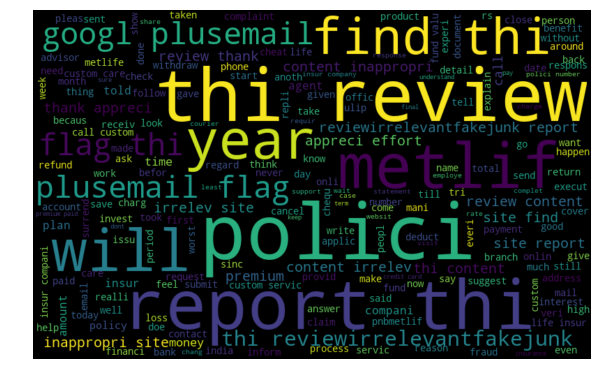

In [45]:
all_words = ' '.join([text for text in data['complaint_1']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

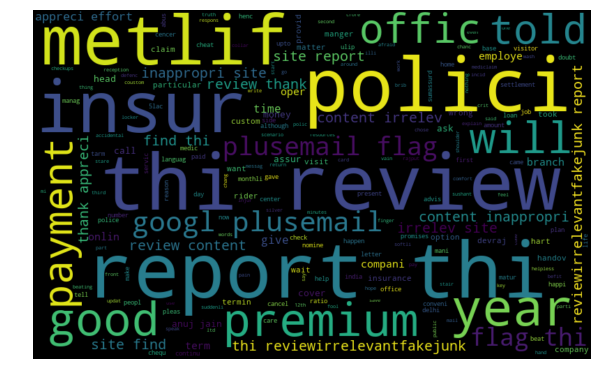

In [52]:
normal_words =' '.join([text for text in data['complaint_1'][data['Rating'] == 5]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

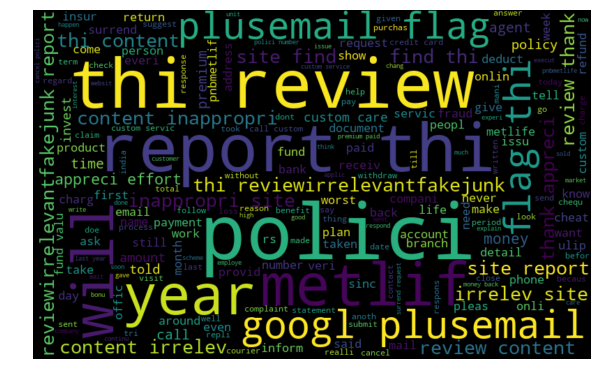

In [53]:
negative_words = ' '.join([text for text in data['complaint_1'][data['Rating'] == 1]])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [54]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [55]:
HT_regular = hashtag_extract(data['complaint_1'][data['Rating'] == 5])

In [56]:
HT_negative =hashtag_extract(data['complaint_1'][data['Rating'] == 1])


In [57]:
# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

# 4. Extracting Features from Cleaned Tweets

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import gensim

C:\Users\Name\Anaconda3\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


### 4.1 Bag-of-Words Features

In [61]:
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(data['complaint_1'])
bow.shape

(130, 1000)

### 4.2 TF-IDF Features

In [62]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(data['complaint_1'])
tfidf.shape

(130, 1000)

# 5. Word Embeddings

### 5.1 Word2Vec Embeddings

In [71]:
tokenized_complaint = data['complaint_1'].apply(lambda x: x.split()) # tokenizing

model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            size=200, # desired no. of features/independent variables 
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34)

model_w2v.train(tokenized_complaint, total_examples= len(data['complaint_1']), epochs=20)

(268388, 402160)

In [72]:
model_w2v.wv.most_similar(positive="good")

C:\Users\Name\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('settlement', 0.8191346526145935),
 ('opportun', 0.8179007768630981),
 ('lic.', 0.8083360195159912),
 ('although', 0.8032935857772827),
 ('hart', 0.7877063751220703),
 ('access', 0.7807028889656067),
 ('perfect', 0.7767312526702881),
 ('genuin', 0.7725419998168945),
 ('differ', 0.771198570728302),
 ('buy', 0.7703607082366943)]

In [73]:
model_w2v['good']

array([-0.42932385, -0.05310866, -0.27881444, -0.0786785 , -0.00641092,
       -0.31260967, -0.48005173, -0.0704679 ,  0.17475124,  0.22158208,
       -0.17021722, -0.02272043,  0.20730132,  0.252456  , -0.02045993,
        0.36276692,  0.24104103, -0.11701693,  0.07943407, -0.09251271,
       -0.06004064,  0.35727715, -0.05813886, -0.08069774,  0.00859615,
        0.36143222,  0.26982957,  0.07583804, -0.15881774, -0.05938341,
       -0.28279662, -0.23251379,  0.1721685 ,  0.06044331,  0.48847607,
       -0.07548481,  0.04172782,  0.19704795, -0.02833773, -0.07331991,
       -0.3928042 ,  0.27213836,  0.20658891, -0.30077285, -0.17103046,
       -0.23040238, -0.09683889,  0.03410636, -0.0826688 ,  0.04756203,
        0.09464652, -0.18861902,  0.04213985,  0.1632081 , -0.00249111,
        0.16246337, -0.09534501, -0.15114453, -0.02957579, -0.11954553,
        0.09818636, -0.14751448, -0.2557228 ,  0.24015181, -0.31990117,
       -0.1463571 , -0.21870248, -0.09689097,  0.1143958 ,  0.11

In [74]:
len(model_w2v['good']) #The length of the vector is 200

200

### 5.2 Preparing Vectors for Tweets

In [75]:
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model_w2v[word].reshape((1, size))
            count += 1.
        except KeyError: # handling the case where the token is not in vocabulary
                         
            continue
    if count != 0:
        vec /= count
    return vec

In [76]:
wordvec_arrays = np.zeros((len(tokenized_complaint), 200))

for i in range(len(tokenized_complaint)):
    wordvec_arrays[i,:] = word_vector(tokenized_complaint[i], 200)
    
wordvec_df = pd.DataFrame(wordvec_arrays)
wordvec_df.shape

(130, 200)

### 5.3  Doc2Vec Embedding

In [77]:
def add_label(twt):
    output = []
    for i, s in zip(twt.index, twt):
        output.append(LabeledSentence(s, ["complaint_" + str(i)]))
    return output

In [81]:
from gensim.models.doc2vec import LabeledSentence
labeled_complaint = add_label(tokenized_complaint) # label all the tweets

In [82]:
labeled_complaint[:6]

[LabeledSentence(words=['third', 'class', 'servic', 'they', 'cheaters.', 'never', 'ever', 'this.', 'while', 'take', 'money', 'they', 'bother', 'about', 'ident', 'person', 'give', 'money', 'while', 'refund', 'surrend', 'polici', 'they', 'want', 'commun', 'with', 'polici', 'owner', 'onli', 'that', 'with', 'regist', 'mobil', 'number', 'phone', 'number.', 'when', 'polici', 'surrend', 'they', 'misguid', 'polici', 'owner', 'say', 'that', 'will', 'increas', 'cancel', 'surrend', 'request', 'they', "don't", 'even', 'respond', 'when', 'surrend', 'polici', 'second', 'time.', 'there', 'benefit', 'metlif', 'polici', 'they', 'just', 'want', 'make', 'profit', 'from', 'custom', 'money.', 'pay', 'premium', '25000', 'which', '3000', 'deduct', 'everi', 'year', 'from', 'profit', 'which', 'invest', 'amount.', '...googl', 'plusemail', 'flag', 'thi', 'reviewirrelevantfakejunk', 'report', 'thi', 'content', 'inappropri', 'site:', 'find', 'thi', 'review', 'content', 'irrelev', 'site,', 'report', 'thi', 'review!

In [83]:
model_d2v = gensim.models.Doc2Vec(dm=1, # dm = 1 for ‘distributed memory’ model 
                                  dm_mean=1, # dm = 1 for using mean of the context word vectors
                                  size=200, # no. of desired features
                                  window=5, # width of the context window
                                  negative=7, # if > 0 then negative sampling will be used
                                  min_count=5, # Ignores all words with total frequency lower than 2.
                                  workers=3, # no. of cores
                                  alpha=0.1, # learning rate
                                  seed = 23)

model_d2v.build_vocab([i for i in (labeled_complaint)])

C:\Users\Name\Anaconda3\lib\site-packages\gensim\models\doc2vec.py:570: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


In [84]:
model_d2v.train(labeled_complaint, total_examples= len(data['complaint_1']), epochs=15)

In [86]:
docvec_arrays = np.zeros((len(tokenized_complaint), 200))

for i in range(len(data)):
    docvec_arrays[i,:] = model_d2v.docvecs[i].reshape((1,200))
    
docvec_df = pd.DataFrame(docvec_arrays)
docvec_df.shape

(130, 200)